# 线性回归预测房价
**任务:**
基于 usa_house_price.csv 数据，建立线性回归模型，预测合理房价:
1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
2、以 income、house age、numbers of rooms、population、area 为输入变量，建立多因子模型，评估模型表现
3、预测 Income = 65000, House Age = 5, Numbers of rooms = 5, Population = 30000, size = 200 的合理房价

In [3]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


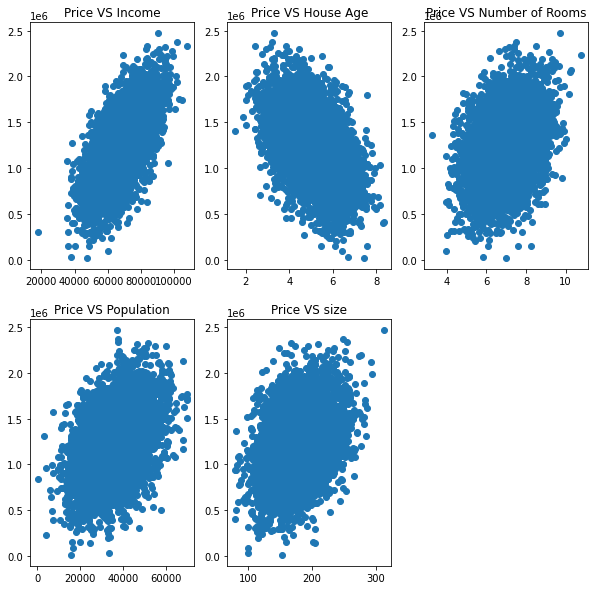

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('Price VS House Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Price VS Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Price VS Population')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.title('Price VS size')
plt.show()

In [7]:
# define x and y
x = data.loc[:, 'size']
y = data.loc[:, 'Price']
x.head()

0    188.214212
1    160.042526
2    227.273545
3    164.816630
4    161.966659
Name: size, dtype: float64

In [11]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
print(x.shape)
print(y.shape)

(5000, 1)
(5000, 1)


In [12]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
# train the model
LR1.fit(x, y)

LinearRegression()

In [14]:
# calculate the prince vs size
y_predict_1 = LR1.predict(x)
print(y_predict_1)

[[1276881.85636623]
 [1173363.58767144]
 [1420407.32457443]
 ...
 [1097848.86467426]
 [1264502.88144558]
 [1131278.58816273]]


In [15]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mean_squared_error_1, r2_score_1)

108771672553.6264 0.1275031240418234


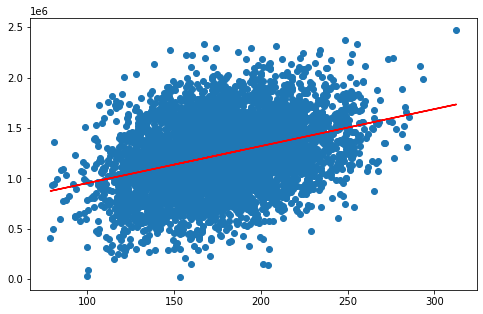

In [17]:
fig6 = plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x, y_predict_1, 'r')
plt.show()

In [18]:
# define x_multi
x_multi = data.drop(['Price'], axis=1)
x_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [19]:
# set up 2nd linear regression model
LR_multi = LinearRegression()
# train the model
LR_multi.fit(x_multi, y)

LinearRegression()

In [22]:
# make prediction
y_predict_multi = LR_multi.predict(x_multi)
print(y_predict_multi)

[[1223968.89166086]
 [1497306.3318863 ]
 [1250884.31019437]
 ...
 [1020693.92390376]
 [1260503.36914585]
 [1302737.7915763 ]]


In [23]:
mean_squared_error_multi = mean_squared_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mean_squared_error_multi, r2_score_multi)

10219846512.17786 0.9180229195220739


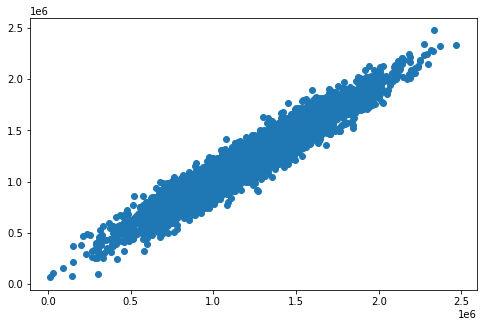

In [24]:
# 多因子
fig7 = plt.figure(figsize=(8, 5))
plt.scatter(y, y_predict_multi)
plt.show()

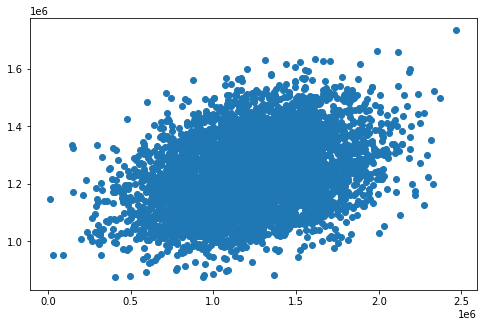

In [25]:
# 单因子
fig8 = plt.figure(figsize=(8, 5))
plt.scatter(y, y_predict_1)
plt.show()

In [27]:
x_test = [65000, 5, 5, 30000, 200]
x_test = np.array(x_test).reshape(1, -1)
print(x_test)

[[65000     5     5 30000   200]]


In [28]:
y_test_predict = LR_multi.predict(x_test)
print(y_test_predict)

[[817052.19516298]]


D:\anaconda3\envs\learn_ai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


线性回归房价实战 summary:
1、通过搭建线性回归模型，实现单因子的房屋价格预测;
2、在单因子模型效果不好的情况下，通过考虑更多的因子，建立多因子模型;
3、多因子模型达到了更好的预测效果，r2 score 为 0.91;
4、实现了预测结果的可视化，直观对比预测价格与实际价格的差异。